# Figures
I will use this notebook to create figures for the paper.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append("/Users/sandesh/repos/quantum-ml/Nanowire Model/")
sys.path.append("/Users/sandesh/repos/quantum-ml/Data Generation/")

import matplotlib as mpl
label_size = 12
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
mpl.rcParams.update({'font.size': 12})

import matplotlib.cm as cm
mpl.rcParams['font.family'] = "serif"

## Single dot figures
I need the following figures

* a plunger trace + associated charge
* dataview of the training set 

In [3]:
import random_single_dot
data_path = "/Users/sandesh/repos/quantum-ml/Data Generation/Figure Data/"

result = random_single_dot.calc_plunger_trace(1024,data_path)

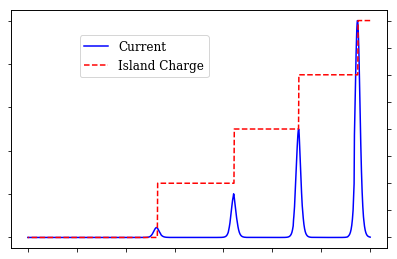

In [11]:
V_P_vec = result['V_P_vec']
current_vec = [x['current'] for x in result['output']]
charge_vec = [np.sum(x['charge']) for x in result['output']]

plt.figure(1)
fig,ax1 = plt.subplots()
p1 = ax1.plot(-V_P_vec,current_vec/np.max(current_vec),'b-',label="Current")
ax1.set_yticklabels([])

ax2 = ax1.twinx()
p2 = ax2.plot(-V_P_vec,charge_vec, 'r--',label="Island Charge")
fig.tight_layout()
labels = [x.get_label() for x in p1 + p2]
fig.legend(p1+p2,labels,loc=(0.2,0.7))

a = plt.gca()
a.set_xticklabels([])
a.set_yticklabels([])
plt.title("")

plt.savefig("/Users/sandesh/Desktop/sd_combined.pdf",dpi=300)

## Double Dot

I need two figures here:
* a deeper map focusing on the honeycombs
* a larger map displaying all 4 states


In [ ]:
import random_double_dot
import imp
imp.reload(random_double_dot)
data_path = "/Users/sandesh/repos/quantum-ml/Data Generation/Figure Data/"

res = random_double_dot.calc_plunger_map(256,data_path)

In [ ]:
V_P1= np.array(res['V_P1_vec'])
V_P2= np.array(res['V_P2_vec'])
N_v = V_P1.shape[0]
XX,YY = np.meshgrid(V_P1,V_P2)


current_vec = np.array([x['current'] for x in res['output']]).reshape(N_v,N_v)
charge_vec = np.array([np.sum(x['charge']) for x in res['output']]).reshape(N_v,N_v)
state_vec = np.array([x['state'] for x in res['output']]).reshape(N_v,N_v)
sensor_vec = np.array([x['sensor'] for x in res['output']]).reshape(N_v,N_v,-1)

plt.figure(1)
plt.pcolor(-XX,-YY,1e4*current_vec,vmax=1.0,cmap=cm.RdYlGn)
cbar = plt.colorbar()
cbar.set_ticks([])
cbar.set_ticklabels([])
a = plt.gca()
a.set_xticklabels([])
a.set_yticklabels([])
plt.savefig("/Users/sandesh/Desktop/dd_current.pdf",dpi=300)

plt.figure(2)
plt.pcolor(-XX,-YY,charge_vec)
cbar = plt.colorbar()
cbar.set_ticks([])
cbar.set_ticklabels([])
a = plt.gca()
a.set_xticklabels([])
a.set_yticklabels([])
plt.savefig("/Users/sandesh/Desktop/dd_charge.pdf",dpi=300)

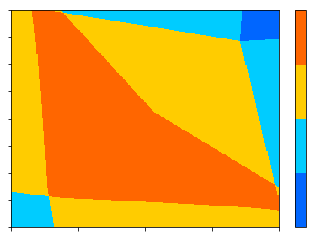

In [22]:
plt.figure(3)
import matplotlib as mpl
cmap = mpl.colors.ListedColormap([[0., .4, 1.], [0., .8, 1.],
                                  [1., .8, 0.], [1., .4, 0.]])
plt.pcolor(-XX,-YY,state_vec,cmap=cmap)
a = plt.gca()
a.set_xticklabels([])
a.set_yticklabels([])
cbar = plt.colorbar()
cbar.set_ticks([])
cbar.set_ticklabels([])
plt.savefig("/Users/sandesh/Desktop/dd_state_types.pdf",dpi=300)